# Linear Regression Analysis

## World Happiness Report
#### Description: This dataset contains information about happiness scores and various contributing factors such as GDP per capita, social support, and life expectancy across different countries. It can be used to predict happiness scores based on these features using linear regression."

## Perform Linear Regression using the selected continuous dependent variable.


## Part 1: Data Preprocessing: Handle missing values, outliers, and normalize data if necessary.

### 1.1 Importing the dataset and required libraries, modules, and functions.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data_2015 = pd.read_csv('C:/Users/User/Downloads/2015/2015.csv')



In [165]:
data_2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### 1.2 Checking for missing values in the dataset

In [ ]:
# Check for missing values in the dataset
missing_2015 = data_2015.isnull().sum()


In [167]:
missing_2015

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### 1.3 Standardizing features

In [194]:
from sklearn.preprocessing import StandardScaler

# Selecting continuous variables for regression, excluding non-numerical and rank columns
X = data_2015[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                           'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]


In [ ]:
# Data Preprocessing: Normalize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 1.4 Extracting the dependent variable (Happiness Score)


In [170]:
target_2015 = data_2015['Happiness Score']



### 1.5 Displaying the standardized data


In [171]:
X_scaled[:5]

array([[ 1.36962124,  1.32028142,  1.26340809,  1.57743784,  2.30965159,
         0.47103971,  0.75825809],
       [ 1.13522625,  1.51445776,  1.28943383,  1.33245589, -0.01647953,
         1.57585637,  1.09285682],
       [ 1.19286069,  1.36105403,  0.99222882,  1.4696591 ,  2.8427738 ,
         0.8242928 ,  0.71233526],
       [ 1.52512972,  1.25192192,  1.0351449 ,  1.60513145,  1.8520808 ,
         0.8686375 ,  0.66389338],
       [ 1.1948764 ,  1.22120434,  1.11805373,  1.36041579,  1.55572536,
         1.74856316,  0.63933717]])

### 1.6 Getting the Inputs and Outputs

In [ ]:
# Convert categorical variables into a new binary column using one-hot encoding
data_2015_encoded = pd.get_dummies(data_2015, drop_first=True)

#Independent Variables 
X = data_2015_encoded.drop(columns='Happiness Score')
X

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country_Albania,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,False,...,False,False,False,False,False,False,False,False,False,True
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,False,...,False,False,False,False,False,False,False,False,False,True
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,False,...,False,False,False,False,False,False,False,False,False,True
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,False,...,False,False,False,False,False,False,False,False,True,False
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,False,...,False,False,False,False,False,False,False,False,True,False
155,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,False,...,False,False,False,False,True,False,False,False,False,False
156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Dependent Variables
y = data_2015_encoded['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

### 1.7 Creating the Training Set and the Test Set

In [174]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function (libro)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




In [175]:

X_train

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country_Albania,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
16,17,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961,False,...,False,False,False,False,False,False,False,False,False,True
130,131,0.06130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791,False,...,False,False,False,False,False,False,False,False,True,False
134,135,0.03260,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927,False,...,False,False,False,False,True,False,False,False,False,False
22,23,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131,False,...,False,False,False,True,False,False,False,False,False,False
93,94,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,False,...,False,False,False,False,False,False,False,False,False,False
103,104,0.06107,1.12094,1.20215,0.75905,0.32112,0.02758,0.12800,1.24074,False,...,False,True,False,False,False,False,False,False,False,False
67,68,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,False,...,False,False,False,False,True,False,False,False,False,False
117,118,0.06740,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857,False,...,False,False,False,False,False,False,False,False,True,False


In [176]:
X_test

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country_Albania,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
7,8,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,False,...,False,False,False,False,False,False,False,False,False,True
44,45,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893,2.24639,False,...,False,True,False,False,False,False,False,False,False,False
113,114,0.04742,0.54558,0.67954,0.40132,0.42342,0.04355,0.23087,2.30919,False,...,False,False,False,False,False,False,False,False,True,False
120,121,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637,False,...,False,False,False,False,False,False,False,True,False,False
63,64,0.03135,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394,False,...,False,True,False,False,False,False,False,False,False,False
122,123,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009,False,...,False,False,False,False,False,False,False,False,True,False
121,122,0.03780,0.19073,0.60406,0.44055,0.43450,0.15048,0.24325,2.44876,False,...,False,False,False,False,False,False,False,False,True,False
139,140,0.04797,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812,False,...,False,False,False,False,False,False,False,False,True,False
109,110,0.04449,1.00880,0.54447,0.69805,0.30033,0.05863,0.38086,1.69440,False,...,False,False,False,False,True,False,False,False,False,False
92,93,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359,1.73933,False,...,False,True,False,False,False,False,False,False,False,False


In [177]:
y_train

16     6.946
130    4.292
134    4.194
22     6.810
93     4.971
       ...  
9      7.284
103    4.800
67     5.605
117    4.550
47     5.975
Name: Happiness Score, Length: 126, dtype: float64

In [178]:
y_test

7      7.364
44     5.995
113    4.633
120    4.514
63     5.716
122    4.507
121    4.512
139    3.956
109    4.686
92     5.007
24     6.786
141    3.904
26     6.670
60     5.770
80     5.194
97     4.885
129    4.297
98     4.876
142    3.896
56     5.828
45     5.987
33     6.455
59     5.791
8      7.286
40     6.168
37     6.298
101    4.857
19     6.901
144    3.819
108    4.694
51     5.889
54     5.848
Name: Happiness Score, dtype: float64

## Part 2: Model Implementation: Use appropriate libraries (e.g., Scikit-learn in Python).

### 2.1 Building the model

In [179]:
# linear_model is the module
# `LinearRegression is a class` is defining that `LinearRegression` is a class within the `linear_model` module. It indicates that `LinearRegression` is a blueprint or template for creating objects that represent linear regression models.
# Class is a pre-coded blueprint of something we want to build from which objects are created.
from sklearn.linear_model import LinearRegression
model_2015 = LinearRegression()



### 2.2 Training the Model

In [180]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [181]:
# fit is a method inside LinearRegression class - they are like functions.
model_2015.fit(X_train_scaled, y_train)


LinearRegression()

### 2.3 Inference

In [ ]:
#Predicted Values
y_pred = model_2015.predict(X_test_scaled)
y_pred

array([7.20373398, 5.86103611, 4.48319718, 4.44196807, 5.65830123,
       4.31960308, 4.3954347 , 4.03961284, 4.75261834, 5.09992881,
       6.51095744, 4.11276428, 6.4025212 , 5.70405335, 4.73087377,
       5.31905138, 4.61183713, 5.00753032, 4.13925877, 5.91815922,
       6.02669236, 6.11157855, 5.78305199, 6.83237386, 6.0709217 ,
       6.02038929, 5.27874068, 6.59189662, 4.30615121, 4.54231246,
       5.62451586, 5.87721994])

In [ ]:
#Actual Values
y_test

7      7.364
44     5.995
113    4.633
120    4.514
63     5.716
122    4.507
121    4.512
139    3.956
109    4.686
92     5.007
24     6.786
141    3.904
26     6.670
60     5.770
80     5.194
97     4.885
129    4.297
98     4.876
142    3.896
56     5.828
45     5.987
33     6.455
59     5.791
8      7.286
40     6.168
37     6.298
101    4.857
19     6.901
144    3.819
108    4.694
51     5.889
54     5.848
Name: Happiness Score, dtype: float64

## Part 3: Evaluation Metrics: Calculate R-squared, Mean Squared Error, etc.

### Calculate R-squared and MSE for both models

### 3.1 R-Squared

In [193]:

from sklearn.metrics import r2_score

#Calculating R-Squared
r2_2015 = r2_score(y_test, y_pred)
r2_2015

0.9406654043085512

### 3.2 Adjusted R-Squared

In [189]:
k = X_test.shape[1]
k

175

In [190]:
n = X_test.shape[0]
n
#n is the sample size

32

In [192]:
adj_r2 = 1-(1-r2_2015)*(n-1)/(n-k-1)
adj_r2

1.012773419905798

### 3.3 Mean Squared Error

In [ ]:
#Calculating Mean Squared Error
mse_2015 = mean_squared_error(y_test, y_pred)
mse_2015

np.float64(0.06067138321461446)

## Part 4: Interpretation: Explain the significance of coefficients and the model's predictive power.

In [ ]:
# Assuming 'features_2015' is the original DataFrame used for training the model

coefficients = pd.DataFrame(model_2015.coef_, X.columns, columns=['Coefficient'])

# Display the coefficients
coefficients.head()

#Interpretation
#The positive coefficient means that the feature increases, the target variable increases. 
#The negative coefficient means that the feature increases, the target variable decreases. 

# In this case the results that we obtain in Happiness Rank	is -0.246276, means that countries with lower rank tends to have a lower happiness score.
# Standard Error is -0.009279, means that having a low standard error, reflects a low happiness score. 
# Economy	is 0.167077, means that countries with higher GDPs tend to have higher happiness scores.
# Family	is 0.176670, means that strong family tends to have higher happiness scores.
# Health	is 0.132987, means that having a better health contribute to happiness.

,Coefficient
Happiness Rank,-0.246276
Standard Error,-0.009279
Economy (GDP per Capita),0.167077
Family,0.176670
Health (Life Expectancy),0.132987


## Visualization

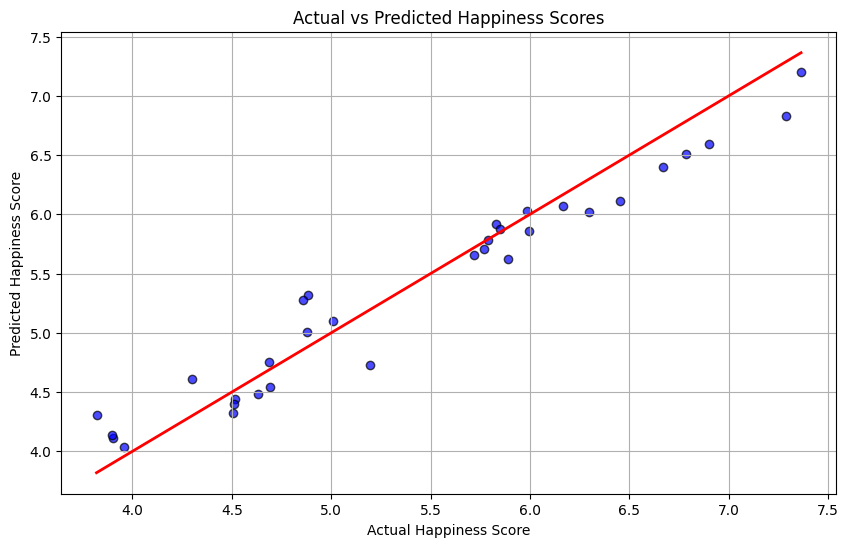

In [ ]:
# Plot actual vs predicted happiness scores

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Happiness Scores')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.grid(True)
plt.show()


# X-Axis (Actual Happiness Score): Represents the actual values of happiness scores from the data.

# Y-Axis (Predicted Happiness Score): Represents the predicted happiness scores that your model generated based on the input features.

# Blue Dots: Each dot represents a single observation, with its position indicating the actual happiness score (x-axis) and the predicted score (y-axis).

# Red Line: The red line represents the line y=x,  which is the line of perfect predictions. If all points lie exactly on this line, it would indicate that the model predicted each happiness score perfectly

# Since most points are close to the red line, it indicates that the model is predicting the happiness scores fairly accurately 
# though some points deviate from the line, indicating errors in the model’s predictions for those specific observations.